In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
from math import cos, sin

face3d = np.load('f3d_68_pts.npy')
print(face3d.shape)

(3, 68)


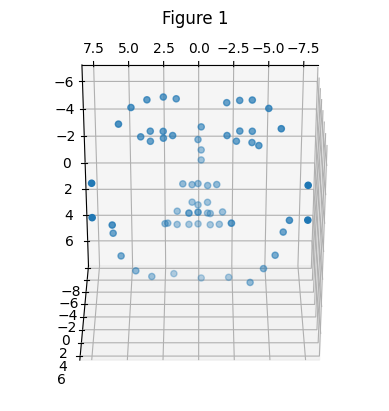

In [38]:
# TODO 1: Draw the 3D facial landmarks.
from matplotlib import projections


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(face3d[0,:], face3d[1,:], face3d[2,:])
ax.view_init(120, 90, 0)
plt.title('Figure 1')
plt.show()

In [46]:
# TODO 2: Computer the Euclidean distance between inner eyes.
import math

def dist(point1, point2):
  euc = math.sqrt((point2[0]-point1[0])**2 + (point2[1]-point1[1])**2 + (point2[2]-point1[2])**2)
  return euc
  
dist_eye = dist(face3d[:,39], face3d[:,42])
print(f"distance: {dist_eye:.6f}")


distance: 3.835801


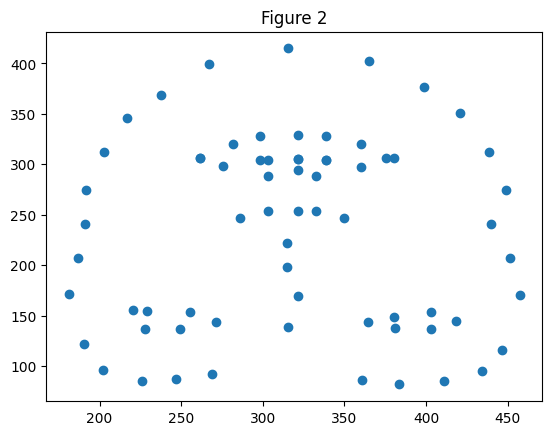

Text(0.5, 1.0, 'Figure 3')

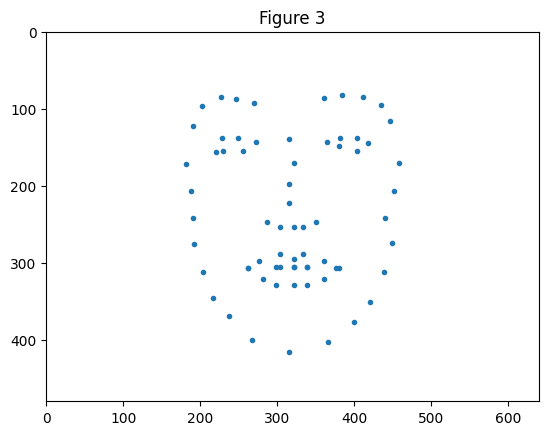

In [63]:
# TODO 3: 3D-to-2D Projection.
# Step 3.1: Construct the intrinsic matrix K.
k = np.array([[640, 0, 320],
              [0, 640, 240],
              [0, 0, 1]])
# Step 3.2: Contruct the extrinsic matrix [R,t].
r = np.eye(3, 3)
t = np.array([[0],
              [0],
              [30]])
ext_matrix = np.hstack([r, t])

# Step 3.3: Construct the 2D projection matrix m.
def get_mi_hat(input_arr, idx):
  k = np.array([[640, 0, 320],
                [0, 640, 240],
                [0, 0, 1]])
  r = np.eye(3, 3)
  t = np.array([[0],
                [0],
                [30]])
  ext_matrix = np.hstack([r, t])
  mi_hat = k.dot(ext_matrix).dot(np.vstack([np.array([input_arr[:, idx]]).T, [1]]))
  mi = np.array([mi_hat[0]/mi_hat[2],
                 mi_hat[1]/mi_hat[2]])
  return mi

m = np.array([get_mi_hat(face3d, idx) for idx in range(face3d.shape[1])]).squeeze().T
  
# Step 3.4: Plot matrix m.
fig2 = plt.figure()
plt.scatter(m[0,:], m[1,:])
plt.title('Figure 2')
plt.show()
# Step 3.5: Plot matrix m with imshow.
fig3 = plt.figure()
white_image = np.full((480, 640, 3), 255)
plt.imshow(white_image)
plt.plot(m[0,:], m[1,:], '.')
plt.title('Figure 3')


In [42]:
# Question 1: Why is the orientation of the face in Figure 2 different from that in Figure 3?

## Question 1: Why is the orientation of the face in Figure 2 different from that in Figure 3?

### ANS:

Figure 2 use `plt.show()` function which can plot out a function, the origin of the plot start from bottom left. As for Figure 3, we use `plt.imshow()` which is used for print out image, the origin start from top left. This is the reason why two figure have different orientation.

Text(0.5, 0.98, 'Figure 4')

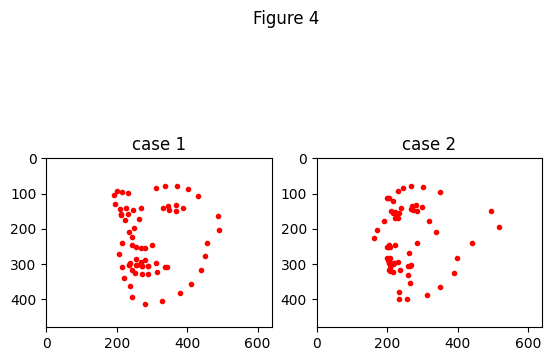

In [65]:
# TODO 4: Repeat Steps 3.1, 3.2, 3.3, 3.5 with different rotation matrices.
from math import cos, sin, degrees, radians
def get_rotation_matrix(alpha, beta, gamma):
  yaw = np.array(
    [[cos(radians(alpha)), -sin(radians(alpha)), 0],
     [sin(radians(alpha)), cos(radians(alpha)), 0],
     [0, 0, 1]]
  )
  pitch = np.array(
    [[cos(radians(beta)), 0, sin(radians(beta))],
     [0, 1, 0],
     [-sin(radians(beta)), 0, cos(radians(beta))]]
  )
  roll = np.array(
    [[1, 0, 0],
     [0, cos(radians(gamma)), -sin(radians(gamma))],
     [0, sin(radians(gamma)), cos(radians(gamma))]]
  )
  rotation_matrix = yaw.dot(pitch).dot(roll)
  return rotation_matrix

def get_mi_hat_rotation(input_arr, idx, r):
  k = np.array([[640, 0, 320],
                [0, 640, 240],
                [0, 0, 1]])
  t = np.array([[0],
                [0],
                [30]])
  ext_matrix = np.hstack([r, t])
  mi_hat = k.dot(ext_matrix).dot(np.vstack([np.array([input_arr[:, idx]]).T, [1]]))
  mi = np.array([mi_hat[0]/mi_hat[2],
                 mi_hat[1]/mi_hat[2]])
  return mi

# case1
fig4 = plt.figure()
plt.subplot(1, 2, 1)
r1 = get_rotation_matrix(0, 20, 0)
m_r1 = np.array([get_mi_hat_rotation(face3d, idx, r=r1) for idx in range(face3d.shape[1])]).squeeze().T
white_image = np.full((480, 640, 3), 255)
plt.imshow(white_image)
plt.plot(m_r1[0,:], m_r1[1,:], 'r.')
plt.title('case 1')
# case2
plt.subplot(1, 2, 2)
r2 = get_rotation_matrix(0, 60, 0)
m_r2 = np.array([get_mi_hat_rotation(face3d, idx, r=r2) for idx in range(face3d.shape[1])]).squeeze().T
white_image = np.full((480, 640, 3), 255)
plt.imshow(white_image)
plt.plot(m_r2[0,:], m_r2[1,:], 'r.')
plt.title('case 2')
fig4.suptitle('Figure 4')
# enter your code here

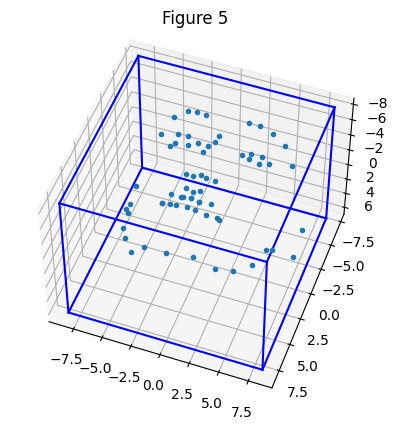

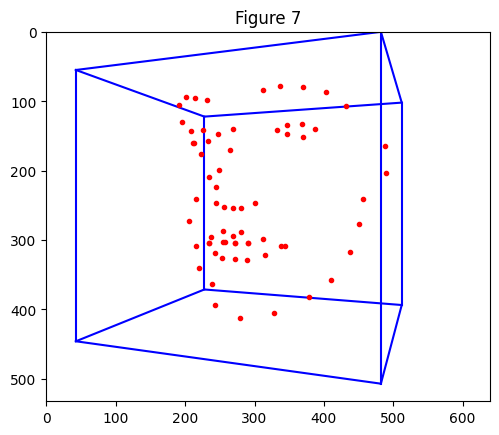

In [177]:
# TODO 5: Augmented Reality
# Step 5.1: Construct the eight vertices of the cube containing the 3D facial landmarks


def get_vertices(landmarks):
  xmin = np.amin(landmarks[0,:])-1
  xmax = np.amax(landmarks[0,:])+1
  ymin = np.amin(landmarks[1,:])-1
  ymax = np.amax(landmarks[1,:])+1
  zmin = np.amin(landmarks[2,:])-1
  zmax = np.amax(landmarks[2,:])+1
  return [xmin, xmax, ymin, ymax, zmin, zmax]


def draw_vertices_3d(vertice_ls, landmarks):
  fig5 = plt.figure()
  ax = plt.axes(projection='3d')
  # xmin to x max
  ax.plot([vertice_ls[0], vertice_ls[1]], [vertice_ls[2], vertice_ls[2]], [vertice_ls[4], vertice_ls[4]], 'b')
  ax.plot([vertice_ls[0], vertice_ls[1]], [vertice_ls[2], vertice_ls[2]], [vertice_ls[5], vertice_ls[5]], 'b')
  ax.plot([vertice_ls[0], vertice_ls[1]], [vertice_ls[3], vertice_ls[3]], [vertice_ls[4], vertice_ls[4]], 'b')
  ax.plot([vertice_ls[0], vertice_ls[1]], [vertice_ls[3], vertice_ls[3]], [vertice_ls[5], vertice_ls[5]], 'b')
  # ymin to ymax
  ax.plot([vertice_ls[0], vertice_ls[0]], [vertice_ls[2], vertice_ls[3]], [vertice_ls[4], vertice_ls[4]], 'b')
  ax.plot([vertice_ls[0], vertice_ls[0]], [vertice_ls[2], vertice_ls[3]], [vertice_ls[5], vertice_ls[5]], 'b')
  ax.plot([vertice_ls[1], vertice_ls[1]], [vertice_ls[2], vertice_ls[3]], [vertice_ls[4], vertice_ls[4]], 'b')
  ax.plot([vertice_ls[1], vertice_ls[1]], [vertice_ls[2], vertice_ls[3]], [vertice_ls[5], vertice_ls[5]], 'b')
  # zmin to zmax
  ax.plot([vertice_ls[0], vertice_ls[0]], [vertice_ls[2], vertice_ls[2]], [vertice_ls[4], vertice_ls[5]], 'b')
  ax.plot([vertice_ls[0], vertice_ls[0]], [vertice_ls[3], vertice_ls[3]], [vertice_ls[4], vertice_ls[5]], 'b')
  ax.plot([vertice_ls[1], vertice_ls[1]], [vertice_ls[2], vertice_ls[2]], [vertice_ls[4], vertice_ls[5]], 'b')
  ax.plot([vertice_ls[1], vertice_ls[1]], [vertice_ls[3], vertice_ls[3]], [vertice_ls[4], vertice_ls[5]], 'b')
  
  ax.plot(landmarks[0,:], landmarks[1,:], landmarks[2,:], '.')
  ax.view_init(230, 250, 0)
  plt.title('Figure 5')
  plt.show()
  pass


draw_vertices_3d(get_vertices(face3d), face3d)
# Step 5.2: Follow TODO 4 to project the 3D facial landmarks and the eight vertices of the cube onto the 2D space.
def draw_vertices_2d(vertice_ls, landmark_2d):
  fig6 = plt.figure()
  white_image = np.full((480, 640, 3), 255)
  plt.imshow(white_image)
  # plot vertice
  plt.plot([vertice_ls[:,0][0], vertice_ls[:,1][0]], [vertice_ls[:,0][1], vertice_ls[:,1][1]], 'b')
  plt.plot([vertice_ls[:,2][0], vertice_ls[:,3][0]], [vertice_ls[:,2][1], vertice_ls[:,3][1]], 'b')
  plt.plot([vertice_ls[:,6][0], vertice_ls[:,7][0]], [vertice_ls[:,6][1], vertice_ls[:,7][1]], 'b')
  plt.plot([vertice_ls[:,4][0], vertice_ls[:,5][0]], [vertice_ls[:,4][1], vertice_ls[:,5][1]], 'b')
  plt.plot([vertice_ls[:,0][0], vertice_ls[:,3][0]], [vertice_ls[:,0][1], vertice_ls[:,3][1]], 'b')
  plt.plot([vertice_ls[:,4][0], vertice_ls[:,7][0]], [vertice_ls[:,4][1], vertice_ls[:,7][1]], 'b')
  plt.plot([vertice_ls[:,1][0], vertice_ls[:,2][0]], [vertice_ls[:,1][1], vertice_ls[:,2][1]], 'b')
  plt.plot([vertice_ls[:,5][0], vertice_ls[:,6][0]], [vertice_ls[:,5][1], vertice_ls[:,6][1]], 'b')
  plt.plot([vertice_ls[:,0][0], vertice_ls[:,4][0]], [vertice_ls[:,0][1], vertice_ls[:,4][1]], 'b')
  plt.plot([vertice_ls[:,3][0], vertice_ls[:,7][0]], [vertice_ls[:,3][1], vertice_ls[:,7][1]], 'b')
  plt.plot([vertice_ls[:,1][0], vertice_ls[:,5][0]], [vertice_ls[:,1][1], vertice_ls[:,5][1]], 'b')
  plt.plot([vertice_ls[:,2][0], vertice_ls[:,6][0]], [vertice_ls[:,2][1], vertice_ls[:,6][1]], 'b')
  # plot landmark
  plt.plot(landmark_2d[0,:], landmark_2d[1,:], 'r.')
  plt.title('Figure 7')
  pass

r3 = get_rotation_matrix(0, 20, 0)
xmin, xmax, ymin, ymax, zmin, zmax = get_vertices(face3d)
vertices = np.array(
  [[xmin, ymin, zmin],
   [xmax, ymin, zmin],
   [xmax, ymax, zmin],
   [xmin, ymax, zmin],
   [xmin, ymin, zmax],
   [xmax, ymin, zmax],
   [xmax, ymax, zmax],
   [xmin, ymax, zmax]]
).T
m_vertice = np.array([get_mi_hat_rotation(vertices, idx, r=r3) for idx in range(vertices.shape[1])]).squeeze().T
m_r3 = np.array([get_mi_hat_rotation(face3d, idx, r=r3) for idx in range(face3d.shape[1])]).squeeze().T
draw_vertices_2d(m_vertice, m_r3)
